Nilai Permintaan: 3000
Nilai Persediaan: 500
Produksi yang dihasilkan: 40000.00


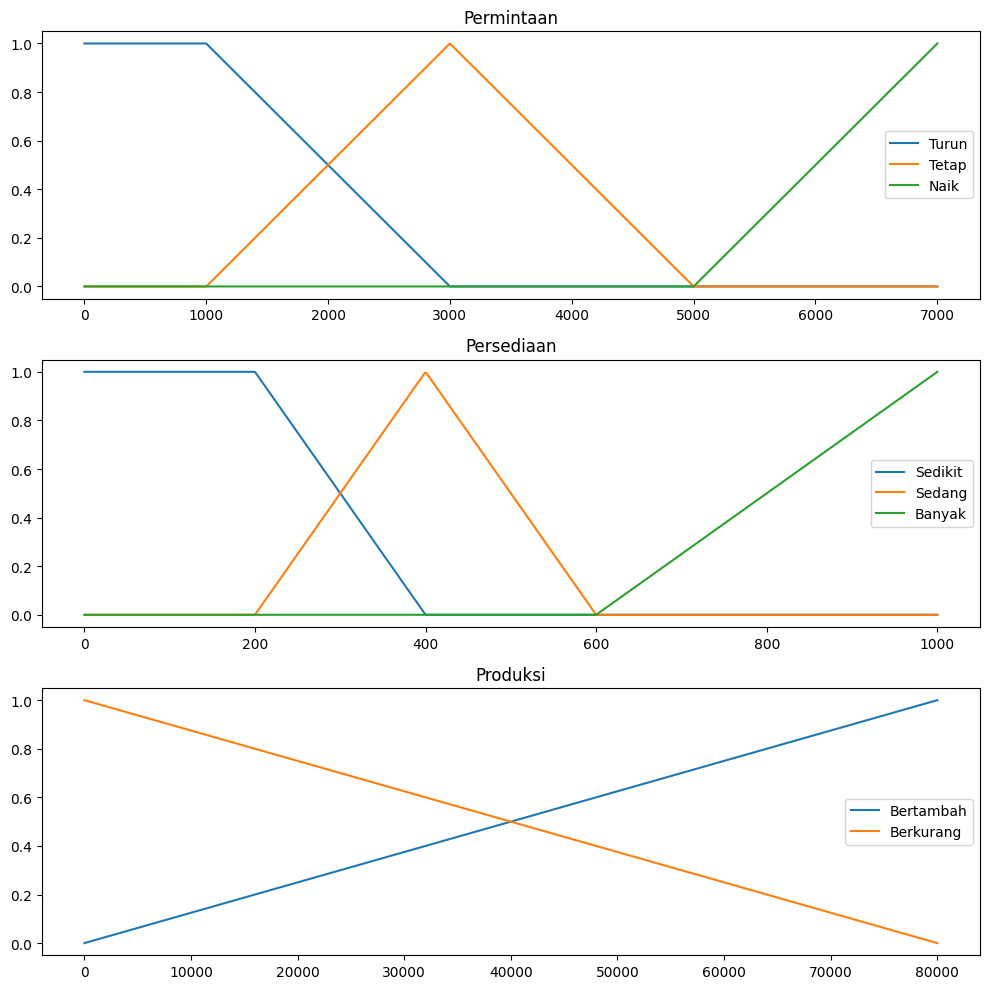

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi keanggotaan untuk Permintaan
def permintaan_turun(x):
    if x <= 1000:
        return 1
    elif 1000 < x <= 3000:
        return (3000 - x) / 2000
    else:
        return 0

def permintaan_tetap(x):
    if 1000 < x <= 3000:
        return (x - 1000) / 2000
    elif 3000 < x <= 5000:
        return (5000 - x) / 2000
    else:
        return 0

def permintaan_naik(x):
    if x <= 5000:
        return 0
    elif 5000 < x <= 7000:
        return (x - 5000) / 2000
    else:
        return 1

# Fungsi keanggotaan untuk Persediaan
def persediaan_sedikit(y):
    if y <= 200:
        return 1
    elif 200 < y <= 400:
        return (400 - y) / 200
    else:
        return 0

def persediaan_sedang(y):
    if 200 < y <= 400:
        return (y - 200) / 200
    elif 400 < y <= 600:
        return (600 - y) / 200
    else:
        return 0

def persediaan_banyak(y):
    if y <= 600:
        return 0
    elif 600 < y <= 1000:
        return (y - 600) / 400
    else:
        return 1

# Fungsi untuk menghitung nilai z (produksi)
def hitung_z(permintaan, persediaan):
    aturan = [
        (permintaan_turun(permintaan), persediaan_sedikit(persediaan), "bertambah"),
        (permintaan_turun(permintaan), persediaan_sedang(persediaan), "berkurang"),
        (permintaan_turun(permintaan), persediaan_banyak(persediaan), "berkurang"),
        (permintaan_tetap(permintaan), persediaan_sedikit(persediaan), "bertambah"),
        (permintaan_tetap(permintaan), persediaan_sedang(persediaan), "berkurang"),
        (permintaan_tetap(permintaan), persediaan_banyak(persediaan), "berkurang"),
        (permintaan_naik(permintaan), persediaan_sedikit(persediaan), "bertambah"),
        (permintaan_naik(permintaan), persediaan_sedang(persediaan), "bertambah"),
        (permintaan_naik(permintaan), persediaan_banyak(persediaan), "berkurang"),
    ]
    
    z_values = []
    weights = []
    
    for alfa, beta, produksi in aturan:
        miu = min(alfa, beta)
        if produksi == "bertambah":
            z = miu * 80000
        else:
            z = 80000 - (miu * 80000)
        
        z_values.append(z)
        weights.append(miu)
    
    if sum(weights) == 0:
        return 0
    return sum(w * z for w, z in zip(weights, z_values)) / sum(weights)

# Input nilai permintaan dan persediaan
permintaan = 3000
persediaan = 500

# Hitung produksi
produksi = hitung_z(permintaan, persediaan)

# Cetak hasil
print(f"Nilai Permintaan: {permintaan}")
print(f"Nilai Persediaan: {persediaan}")
print(f"Produksi yang dihasilkan: {produksi:.2f}")

# Plot fungsi keanggotaan
x_perm = np.linspace(0, 7000, 1000)
y_pers = np.linspace(0, 1000, 500)
z_prod = np.linspace(0, 80000, 500)

plt.figure(figsize=(10, 10))

# Plot Permintaan
plt.subplot(3, 1, 1)
plt.plot(x_perm, [permintaan_turun(x) for x in x_perm], label='Turun')
plt.plot(x_perm, [permintaan_tetap(x) for x in x_perm], label='Tetap')
plt.plot(x_perm, [permintaan_naik(x) for x in x_perm], label='Naik')
plt.title('Permintaan')
plt.legend()

# Plot Persediaan
plt.subplot(3, 1, 2)
plt.plot(y_pers, [persediaan_sedikit(y) for y in y_pers], label='Sedikit')
plt.plot(y_pers, [persediaan_sedang(y) for y in y_pers], label='Sedang')
plt.plot(y_pers, [persediaan_banyak(y) for y in y_pers], label='Banyak')
plt.title('Persediaan')
plt.legend()

# Plot Produksi
plt.subplot(3, 1, 3)
plt.plot(z_prod, [produksi_bertambah(z) for z in z_prod], label='Bertambah')
plt.plot(z_prod, [produksi_berkurang(z) for z in z_prod], label='Berkurang')
plt.title('Produksi')
plt.legend()

plt.tight_layout()
plt.show()
